# Queue Server (`RunEngine`): execute a plan
# Tiled: read back the data
# JupyterHub or Custom Software: Vizualization and Analysis

In [1]:
from tiled.client import from_uri
import matplotlib.pyplot as plt

In [2]:
c = from_uri("http://tld:8000")

In [3]:
run = c[list(c.keys())[-1]]

In [4]:
arr = run['primary']['data'].read()

# Here we measured a 2-d wafer.
Our oracle detector provides absolute insight into element and phase compostion, as well as diffraction information.

In [5]:
arr.keys()

KeysView(<xarray.Dataset> Size: 252kB
Dimensions:                   (time: 24, dim_0: 3, dim_1: 6, dim_2: 2,
                               dim_3: 650)
Coordinates:
  * time                      (time) float64 192B 1.725e+09 ... 1.725e+09
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    wafer_measurement_edx     (time, dim_0) float64 576B 0.317 0.4699 ... 0.2129
    wafer_measurement_phases  (time, dim_1) float64 1kB 0.0 0.0 ... 0.691 0.2508
    wafer_measurement_ioq     (time, dim_2, dim_3) float64 250kB 15.0 ... 0.0...
    wafer_y                   (time) float64 192B 0.0 1.414 ... -2.828 -1.531
    wafer_x                   (time) float64 192B 2.0 1.414 ... 2.828 3.696
Attributes:
    stream_name:  primary)

## From a spiral scan, we can see how the elemental composition changes 

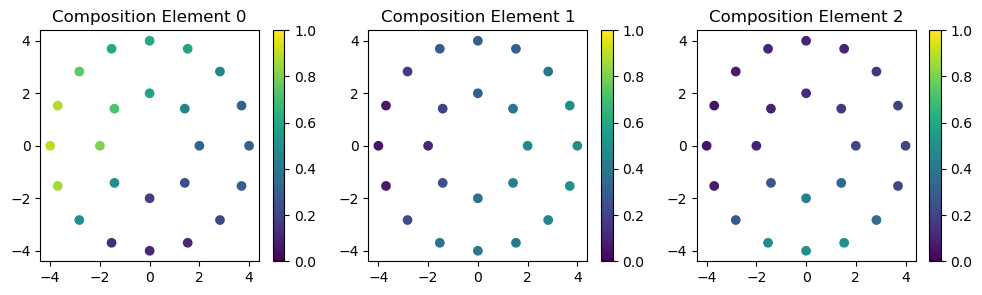

In [10]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i in range(3):
    sc = axes[i].scatter(arr['wafer_x'], arr['wafer_y'], c=arr['wafer_measurement_edx'][:,i], vmin=0, vmax=1)
    plt.colorbar(sc, ax=axes[i])
    axes[i].set_title(f"Composition Element {i}")
fig.show()

## The magic detector also tells us crystallographic phase composition

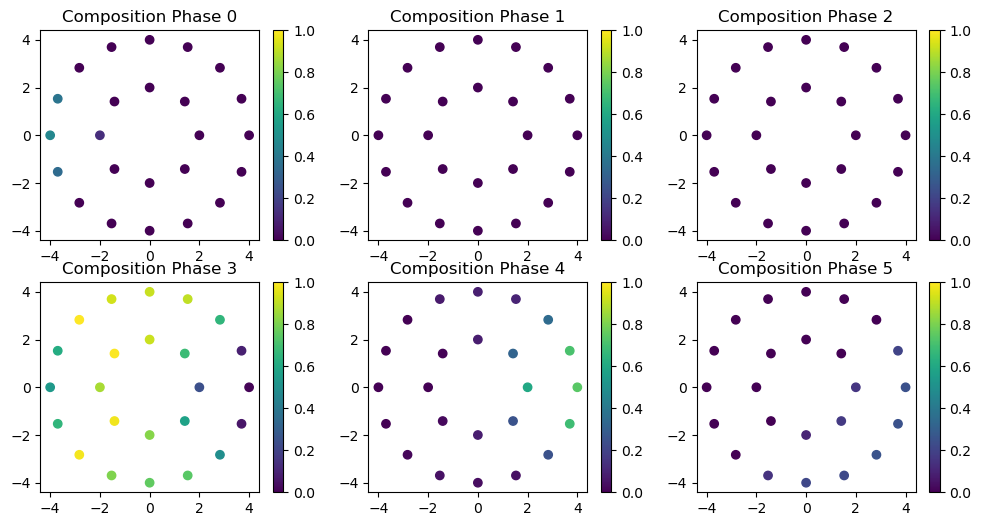

In [14]:
fig, axes = plt.subplots(2,3, figsize=(12,6))
axes=axes.ravel()
for i in range(6):
    sc = axes[i].scatter(arr['wafer_x'], arr['wafer_y'], c=arr['wafer_measurement_phases'][:,i], vmin=0, vmax=1)
    plt.colorbar(sc, ax=axes[i])
    axes[i].set_title(f"Composition Phase {i}")
fig.show()

## Our AI however is only interested in diffraction
Shown here labled by coordinate pair.

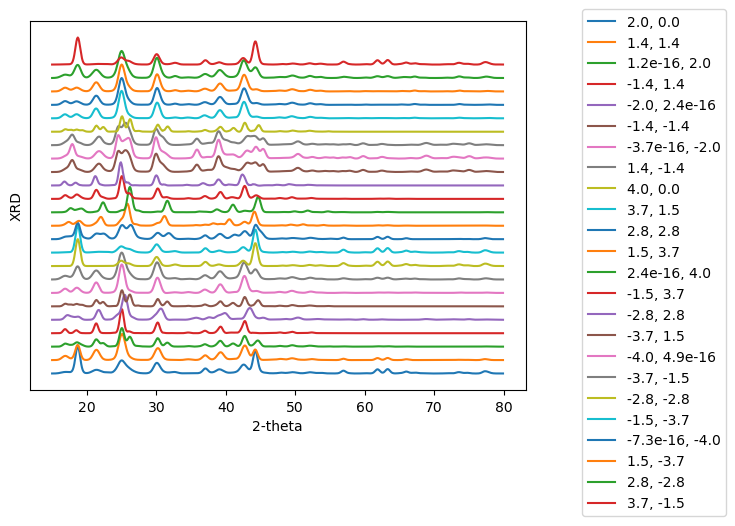

In [30]:
plt.figure()
for i, ((x, y), (q, ioq)) in enumerate(zip(zip(arr['wafer_x'], arr['wafer_y']),arr['wafer_measurement_ioq'])):
    plt.plot(q, ioq+i/2, label=f"{x.data:.2}, {y.data:.2}")
plt.ylabel("XRD")
plt.xlabel("2-theta")
plt.yticks([])
plt.legend(loc="upper left", bbox_to_anchor=(1.1, 1.05))
plt.show()